In [1]:
from sklearn.linear_model import LogisticRegression
import numpy as np

In [2]:
Xraw = np.loadtxt('para.log',unpack=False)
from scipy import stats 



X = stats.zscore(np.log(Xraw), axis=0)


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(np.log(Xraw))
print(scaler.transform(np.log(Xraw))[0])



[ 0.7802934   1.98877067  0.29959262  0.76964399  0.80130244  0.47246895
  0.87276949  0.86618731  2.06028114 -0.65488362 -0.46717054 -0.99041783
 -0.00935007  0.35871328 -0.34488233 -0.59886012 -2.29390382 -0.86103897
  0.2155184   0.20675044  0.97929102  0.21874898 -0.42905348  0.67234193
 -0.15186431]


In [3]:
print(len(X[0]))
print (X.shape)
print (X[0])
print(len(X))

25
(600, 25)
[ 0.7802934   1.98877067  0.29959262  0.76964399  0.80130244  0.47246895
  0.87276949  0.86618731  2.06028114 -0.65488362 -0.46717054 -0.99041783
 -0.00935007  0.35871328 -0.34488233 -0.59886012 -2.29390382 -0.86103897
  0.2155184   0.20675044  0.97929102  0.21874898 -0.42905348  0.67234193
 -0.15186431]
600


In [4]:
Y = np.loadtxt('DAD.log')

In [5]:
#print(Y)

In [10]:
clf = LogisticRegression(random_state=0,C=10).fit(X, Y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [11]:
clf.score(X, Y)

0.9833333333333333

In [12]:
print (clf.coef_[0])

[ 0.11527559  1.42944306  0.10479967 -6.59496409 -0.40248873 -2.94234558
 -0.38665727 -0.10258925  0.15954943  0.60683204 -0.23746221 -0.23027082
 -0.62473644 11.58908834  0.01613368 -0.3519312  -3.40703185 -0.37738363
 -1.02194392  0.99210399  1.12792339 -0.4198156  -0.40200203  1.31785499
 -2.09509401]


<BarContainer object of 25 artists>

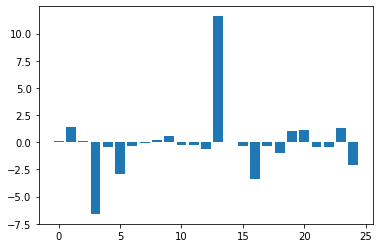

In [13]:
import matplotlib.pyplot as plt
plt.bar(range(len(clf.coef_[0])), clf.coef_[0])

In [14]:
import matplotlib;print('matplotlib: {}'.format(matplotlib. __version__)) 

matplotlib: 3.4.1


In [15]:
import pandas as pd

In [22]:
EAD = pd.read_csv('EAD.log',header=None)


In [23]:
# print (EAD)

In [24]:
clf2 = LogisticRegression(random_state=0,C=10,l1_ratio=0.5,tol=0.01).fit(X, EAD[0])

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


In [25]:
clf2.score(X, EAD)

0.8433333333333334

<BarContainer object of 25 artists>

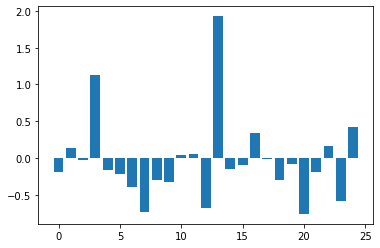

In [26]:
plt.bar(range(len(clf2.coef_[0])), clf2.coef_[0])

In [28]:
index = pd.read_csv('index.log',header=None)

In [51]:
len(X[index[0]])

newX = X[index[0]]

New_EAD = EAD[0][index[0]]

In [62]:
clf2 = LogisticRegression(random_state=2,C=11).fit(newX,New_EAD)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [63]:
clf2.score(newX, New_EAD)

0.9674502712477396

<BarContainer object of 25 artists>

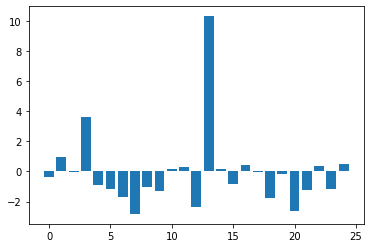

In [59]:
plt.bar(range(len(clf2.coef_[0])), clf2.coef_[0])

In [148]:
from sklearn.decomposition import PCA


260
           0         1         2         3         4         5         6   \
0   -0.692443  0.593358  1.123803 -0.255286 -0.861317  0.411568 -1.325526   
1    0.091504 -0.801017 -0.169864 -0.067634  0.758179  0.535518  0.001206   
2   -0.044509 -0.691760  0.749851  1.057226  0.838464  1.216997 -1.404158   
3   -0.598844  1.462603  0.605301  0.168336  0.707331  0.747154 -0.299657   
4   -1.851224  0.441806  0.003162 -1.439116 -0.594200 -2.870266 -1.346051   
5   -0.586683 -0.747499  0.856470 -0.640078 -0.066323  0.054340 -1.282272   
6    0.691669  1.761958 -1.065422  0.682212  0.441362 -0.103122 -0.213512   
7    1.531799 -2.004360 -1.317791  1.119550  0.589401 -0.776986 -0.524073   
8   -1.038376 -0.308676  0.682802 -0.407270 -0.632755 -0.829883 -0.604628   
9    1.346134  1.023176  0.501819  0.899922 -0.724590  0.887849  1.984778   
10   0.165946  0.056570  0.117009 -0.122952  0.593419 -0.649192 -0.911220   
11   2.015082  0.086379 -1.854361  0.808317  0.582102 -0.358158 -1.27788

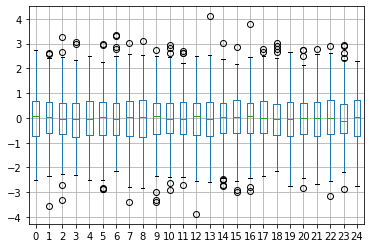

In [165]:
pca = PCA(n_components=5)

x = StandardScaler().fit_transform(newX[New_EAD])

print(len(x))


df = pd.DataFrame(x)


df.boxplot()


print(df)

In [161]:
pca.fit(x*2)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [162]:
print(pca.explained_variance_ratio_)
pca.score(x)

[0.06846149 0.05998411 0.05721481 0.05595144 0.05260774]


-43.1652744862897

In [152]:
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [153]:
kmeans = KMeans(init="k-means++", n_clusters=25, n_init=4,
                random_state=0)

In [154]:
estimator = make_pipeline(StandardScaler(), kmeans).fit(newX[New_EAD])

In [155]:
import pandas as pd; url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [156]:
# print (df)

In [157]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']# Separating out the features
x = df.loc[:, features].values# Separating out the target
y = df.loc[:,['target']].values# Standardizing the features
x = StandardScaler().fit_transform(x)

In [145]:
#print(x)
y = df.loc[:,['target']].values

print(y)

print(df['target'].values)



[['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['

In [146]:
pca2 = PCA(n_components=3);
principalComponents = pca2.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

pca2.fit(x)

print(pca2.explained_variance_ratio_)
pca2.score(x)

[0.72770452 0.23030523 0.03683832]


-3.2704819371969465

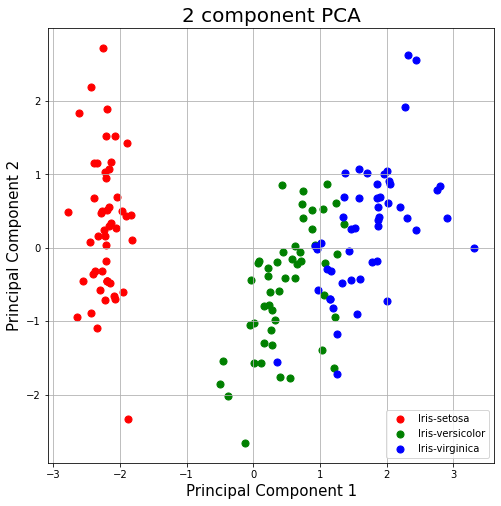

In [147]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()